# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:
data=pd.read_csv('../data/states_edu.csv')
print(data.head())
print(data.info())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [13]:
# Notes for self
# Every column is a float or int excluding the first two. This makes regression easier since there is no encoding of any form
# Binning might be helpful but it would create categories and identity variables in the equation, which is needlessly complicated. Avoid unless necessary
# Assuming model will be linear, easiest way to find relevant features is a correlation matrix. If enough clarity not found here, non-linear methods to be checked
# Several missing values found to exist, including in response variable. To choose from dropping all missing value rows or fill in with mean/median. Only needed for the features that matter though

#Renaming columns first,using same idea as tutorial
data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

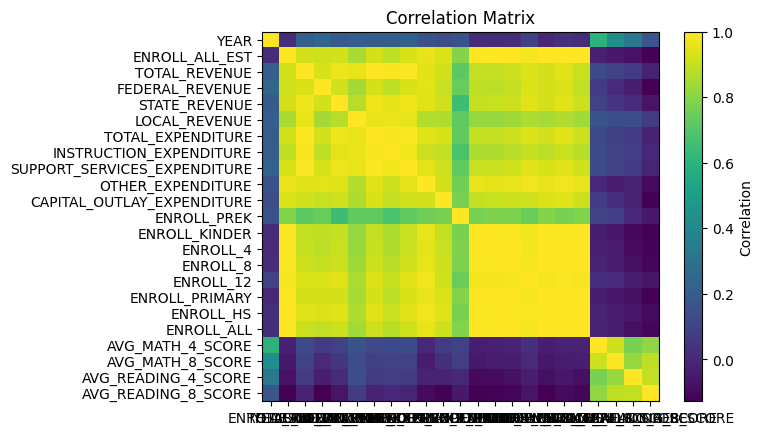

In [26]:
#Dropping the NAs for the response variable first since there are too many to fill values (1113 out 1715)
data.dropna(subset=['AVG_READING_4_SCORE'],inplace=True)
#data.info()
#650 non-null values 
#To find features that are important, will be plotting the correlation matrix here

target = 'AVG_READING_4_SCORE'
temp_data=data.drop(columns=['PRIMARY_KEY','STATE'],errors='ignore').copy()#since they are not numeric

corr = (temp_data.corr().dropna())

#Using a heat map to visualize this

plt.imshow(corr, aspect="auto")
plt.colorbar(label="Correlation")
plt.yticks(range(len(corr)), corr.index)
plt.xticks(range(len(corr)), corr.index)
plt.title("Correlation Matrix")
plt.show()



In [ ]:
#Based on the graph above, the AVG_READING_8_SCORE, AVG_MATH_4_SCORE, and AVG_MATH_8_SCORE are strongly correlated with the target variable. There is also a weaker correlation with YEAR tht could be explored
#Checking missing values for these variables again
data[['YEAR','AVG_READING_4_SCORE','AVG_READING_8_SCORE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']].info()
#There are several null values in the 3 avg columns that are not the target
# Once again, could either remove those values or fill them in

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 1714
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 650 non-null    int64  
 1   AVG_READING_4_SCORE  650 non-null    float64
 2   AVG_READING_8_SCORE  562 non-null    float64
 3   AVG_MATH_4_SCORE     521 non-null    float64
 4   AVG_MATH_8_SCORE     521 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 30.5 KB


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *AVG_READING_4_SCORE*

How many years of data are logged in our dataset? 

In [ ]:
# @@@ 1
data['YEAR'].nunique()
#14 total years are documented

14

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
mich_avg_reading_4 = data[data['STATE']=='MICHIGAN']['AVG_READING_4_SCORE'].mean()
print(mich_avg_reading_4)
ohio_avg_reading_4 = data[data['STATE']=='OHIO']['AVG_READING_4_SCORE'].mean()
print(ohio_avg_reading_4)
#Ohio has the higher average across all years for the chosen variable

217.83333333333334
223.1818181818182


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3
print(data[data['YEAR']==2019]['AVG_READING_4_SCORE'].mean())
# The avergage mean across all states in 2019 is 219.7924

219.79245283018867


For each state, find a maximum value for your chosen test score

In [34]:
# @@@ 4
groups = data.groupby('STATE')
print(groups['AVG_READING_4_SCORE'].max())

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5

#Since we have strongly correlated features already, no need to create new ones. However, have to decide on a strategy to fill the missing values.
# Visualizing variable distributions with null values to see the skew.

col = "AVG_READING_8_SCORE"
data[col].dropna().hist(bins=30)
plt.xlabel(col)
plt.ylabel("count")
plt.title("Histogram of AVG_READING_8_SCORE")
plt.show()

col = "AVG_MATH_8_SCORE"
data[col].dropna().hist(bins=30)
plt.xlabel(col)
plt.ylabel("count")
plt.title("Histogram of AVG_MATH_8_SCORE")
plt.show()

col = "AVG_MATH_4_SCORE"
data[col].dropna().hist(bins=30)
plt.xlabel(col)
plt.ylabel("count")
plt.title("Histogram of AVG_MATH_4_SCORE")
plt.show()

#All 3 of the variables are left-skewed. Would choose median to fill not the mean but it would easier to just drop the na values

In [39]:
data.dropna(subset=['AVG_READING_8_SCORE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE'],inplace=True)

Feature engineering justification: **<Plotted a correlation matrix of the chosen target variable with all the variables in the dataset to find good predictors. Found 3 strong predictors and one weak predictor (only to be used if needed). Since there were 3 strong predictors, no new variables were created. For missing value handling, filling in the values was considered, but eventually the NaNs were dropped keeping in line with the tutorial workflow>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

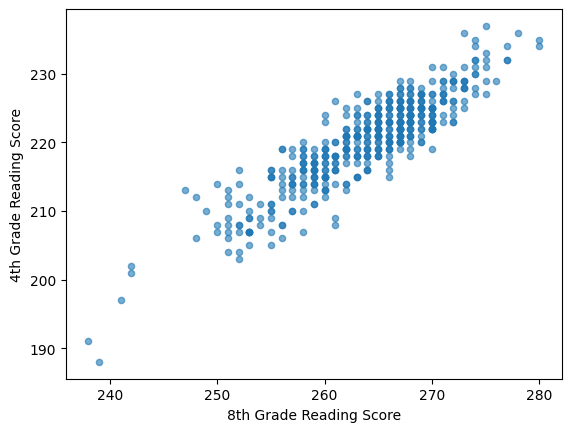

In [40]:
# @@@ 6
data.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('4th Grade Reading Score')

In [41]:
print(data['AVG_READING_4_SCORE'].corr(data['AVG_READING_8_SCORE']))

0.8965955641807892


**<Scatterplot between the 8th Grade reading score and the 4th grade reading score. very clear linear upwards trend between the variables with correlation coefficient of 0.89659>**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

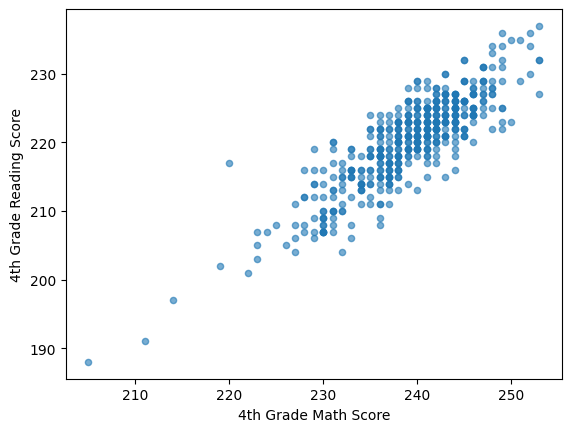

In [42]:
# @@@ 7
data.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

In [44]:
print(data['AVG_READING_4_SCORE'].corr(data['AVG_MATH_4_SCORE']))

0.8643651165321163


**<Scatterplot between the 4th Grade math score and the 4th grade reading score. very clear linear upwards trend between the variables with correlation coefficient of 0.89659>**

In [ ]:
#Third visualization abstracted but correlation coefficient found to be 0.8308
print(data['AVG_READING_4_SCORE'].corr(data['AVG_MATH_8_SCORE']))

0.8308266632893491


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [46]:
from sklearn.model_selection import train_test_split

In [69]:
# @@@ 8

X = data[['AVG_READING_8_SCORE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']].copy()
y = data['AVG_READING_4_SCORE'].copy()
#all nas have been dropped so no need for index matching 

In [70]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [71]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression
#Using linear regression first

In [72]:
# @@@ 11
# create your model here
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
print(model.intercept_)
print(model.coef_)

-48.739278556080905
[ 0.80317371  0.70297824 -0.39451579]


In [75]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [76]:
# @@@ 12
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))
# Achieved an R^2 of 0.87445 on the test data which is good. However, even the training data achieves 0.8778. This means the model generalizes very well which is good.

0.8744588739357122
0.8778154610186977


In [77]:
# mean error
print(np.mean(y_pred-y_test))

# mean absolute error
print(np.mean(np.abs(y_pred-y_test)))


#Values for mean error and mean absolute error are acceptable and similar to the values in the tutorial regression

0.5079383805561732
1.8215344527277348


In [ ]:
# RMSE
print(np.mean((y_pred-y_test)**2)**0.5)
# This value is acceptable as well. 

# Note an experiment was conducted adding the variable YEAR as well to see if it improved performance. Its coefficient was -0.06 and the evaluation metrics did not change. Therefore, the YEAR variable was removed again

2.319269295123092


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

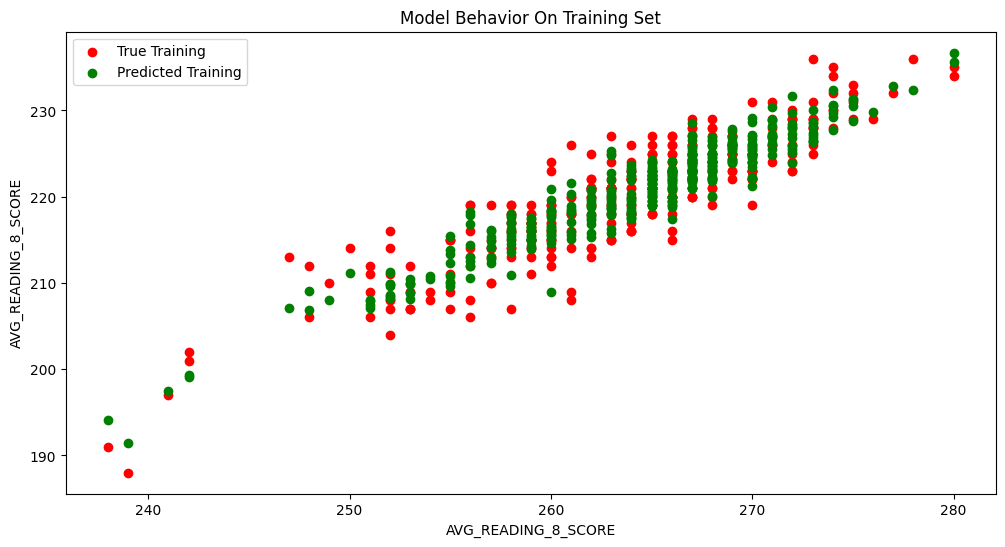

In [60]:
# @@@ 13

col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

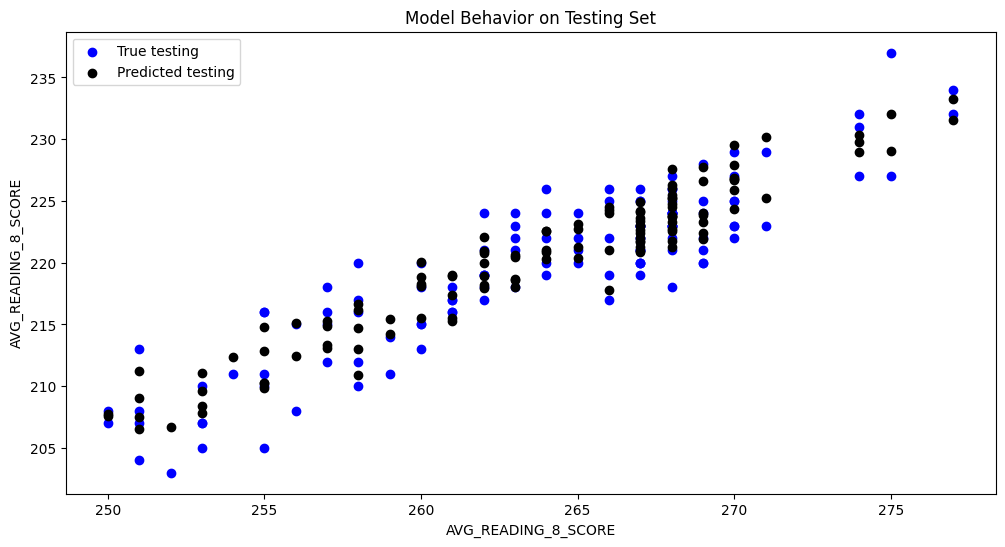

In [61]:
# @@@ 14


col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior on Testing Set")